# Apolloscape Dataset Reader: Localization Task

This is an example of using Apolloscape dataset for route visualization and simple graphs/videos.

In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import HTML

import torch
from datasets.apolloscape import Apolloscape
from utils.common import draw_poses, calc_poses_params
from utils.common import draw_record, make_video
import numpy as np
from torchvision import transforms
import torchvision.utils as vutils
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
import os

%matplotlib inline
plt.ion()



### Setup the Apolloscape root directory

`APOLLO_PATH` is an location with unpacked Apolloscape datasets, e.g. `$APOLLO_PATH/road02_seg` or `$APOLLO_PATH/zpark`. Download data from [Apolloscape page](http://apolloscape.auto/scene.html) and unpack. Let's assume that you've linked this folder to `./data/apolloscape`.

In [2]:
APOLLO_PATH = "./data/apolloscape"

### Create dataset object

In [3]:
# Resize data before using
transform = transforms.Compose([transforms.Resize(250)])

# record_name = "Record029"
# apollo_dataset = Apolloscape(root=os.path.join(APOLLO_PATH), road="road02_seg", transform=transform, record=record_name)

# record_name = "Record018" # Record018 - example with a turn
# apollo_dataset = Apolloscape(root=os.path.join(APOLLO_PATH), road="road03_seg", transform=transform, record=record_name)

# record_name = "Record012"
# apollo_dataset = Apolloscape(root=os.path.join(APOLLO_PATH), road="road04_seg", transform=transform, record=record_name)

# record_name = "Record008"
# apollo_dataset = Apolloscape(root=os.path.join(APOLLO_PATH), road="zpark-sample",
#                              transform=transform, record=record_name)

# apollo_dataset = Apolloscape(root=os.path.join(APOLLO_PATH), road="zpark-sample",
#                              transform=transform, train=True)

stereo = False

record_name = "Record013"
apollo_dataset = Apolloscape(root=os.path.join(APOLLO_PATH), road="zpark-sample",
                             transform=transform, train=False, record=record_name, pose_format='quat',
                             normalize_poses=False, cache_transform=True, stereo=stereo)


print(apollo_dataset)



Dataset: Apolloscape
    Road: zpark-sample
    Record: Record013
    Train: False
    Normalize Poses: False
    Stereo: False
    Length: 240 of 756
    Cameras: ['Camera_2', 'Camera_1']
    Records: ['Record001', 'Record002', 'Record003', 'Record004', 'Record006', 'Record007', 'Record008', 'Record009', 'Record010', 'Record011', 'Record012', 'Record013', 'Record014']



## Show All Records Counts

In [4]:
# Show records with numbers of data points
recs_num = apollo_dataset.get_records_counts()
recs_num = sorted(recs_num.items(), key=lambda kv: kv[1], reverse=True)
print("Records:")
print("\n".join(["\t{} - {}".format(r[0], r[1]) for r in recs_num ]))

Records:
	Record012 - 242
	Record013 - 240
	Record011 - 174
	Record014 - 100
	Record003 - 0
	Record001 - 0
	Record006 - 0
	Record009 - 0
	Record004 - 0
	Record002 - 0
	Record008 - 0
	Record007 - 0
	Record010 - 0


## Show current Record on a plot

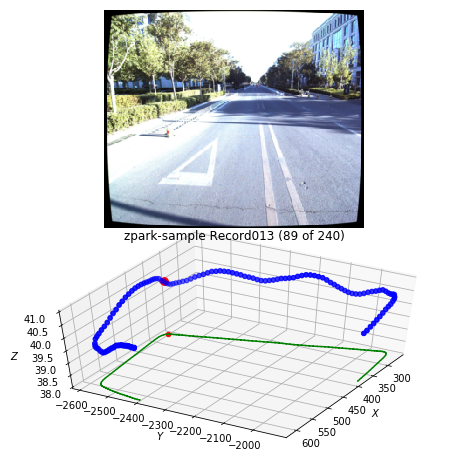

In [5]:

# Draw path of the current record with a sampled datapoint
draw_record(apollo_dataset)
plt.show()
    
# Draw all records
# for record in apollo_dataset.records_list:
#     draw_record(apollo_dataset, record)
    



In [6]:
# apollo_dataset.record = None
# for i in range(len(apollo_dataset)):
#     images, poses = apollo_dataset[i]
#     print('i = {}'.format(i))
        


## Generate video for current record

In [7]:
# Generate videos

# Generate and save video for the record
outfile = "./output_data/videos/video_{}_{}.mp4".format(apollo_dataset.road, apollo_dataset.record)
make_video(apollo_dataset, outfile=outfile)


# Create all available datasets
# road04_dataset = Apolloscape(root=os.path.join(APOLLO_PATH), road="road04_seg",transform=transform)
# road03_dataset = Apolloscape(root=os.path.join(APOLLO_PATH), road="road03_seg",transform=transform)
# road02_dataset = Apolloscape(root=os.path.join(APOLLO_PATH), road="road02_seg", transform=transform)
zpark_sample_dataset = Apolloscape(root=os.path.join(APOLLO_PATH), road="zpark-sample", transform=transform)

# datasets = [road04_dataset, road03_dataset, road02_dataset, zpark_sample_dataset]
datasets = [zpark_sample_dataset]
# datasets = [road04_dataset]

# Generate videos for all records in all datasets
# video will be stored in `./output_data/videos` location
# for dataset in datasets:
#     for record in dataset.records_list:
#         print('dataset = {}, record = {}'.format(dataset.road, record))
#         make_video(dataset, record=record)



  2%|▏         | 2/120 [00:00<00:08, 13.20it/s]

Saving video to: ./output_data/videos/video_zpark-sample_Record013.mp4


100%|██████████| 120/120 [00:07<00:00, 15.37it/s]


Video saved successfully!


In [8]:
# View saved video
HTML("""
<p>Playing <strong>{0}</strong></p>
<video width="640" height="480" controls>
  <source src="{0}" type="video/mp4">
</video>
""".format(outfile))

## Draw all Records of all Datasets

Showing all routes in one graph with projections. Adjust available `datasets` in first lines.

drop images!!!!!! 17 and 17
drop images!!!!!! 22 and 23
drop images!!!!!! 28 and 30
drop images!!!!!! 29 and 32
drop images!!!!!! 33 and 37
drop images!!!!!! 44 and 49
drop images!!!!!! 46 and 52
drop images!!!!!! 49 and 56
drop images!!!!!! 78 and 86
drop images!!!!!! 168 and 177
drop images!!!!!! 191 and 201
drop images!!!!!! 193 and 204
drop images!!!!!! 211 and 223
drop images!!!!!! 245 and 258
drop images!!!!!! 254 and 268
drop images!!!!!! 260 and 275
drop images!!!!!! 287 and 303
drop images!!!!!! 306 and 323
drop images!!!!!! 316 and 334
drop images!!!!!! 1 and 1
drop images!!!!!! 2 and 1
drop images!!!!!! 2 and 2
drop images!!!!!! 3 and 2
drop images!!!!!! 3 and 3
drop images!!!!!! 4 and 3
drop images!!!!!! 4 and 4
drop images!!!!!! 5 and 4
drop images!!!!!! 5 and 5
drop images!!!!!! 6 and 5
drop images!!!!!! 6 and 6
drop images!!!!!! 7 and 6
drop images!!!!!! 7 and 7
drop images!!!!!! 8 and 7
drop images!!!!!! 8 and 8
drop images!!!!!! 9 and 8
drop images!!!!!! 9 and 9
drop i

drop images!!!!!! 19 and 19
drop images!!!!!! 20 and 19
drop images!!!!!! 20 and 20
drop images!!!!!! 21 and 20
drop images!!!!!! 21 and 21
drop images!!!!!! 22 and 21
drop images!!!!!! 22 and 22
drop images!!!!!! 23 and 22
drop images!!!!!! 23 and 23
drop images!!!!!! 24 and 23
drop images!!!!!! 248 and 248
drop images!!!!!! 248 and 249
drop images!!!!!! 249 and 249
drop images!!!!!! 250 and 249
drop images!!!!!! 250 and 250
drop images!!!!!! 250 and 251
drop images!!!!!! 251 and 251
drop images!!!!!! 252 and 251
drop images!!!!!! 48 and 48
drop images!!!!!! 49 and 48
drop images!!!!!! 49 and 49
drop images!!!!!! 50 and 49
drop images!!!!!! 50 and 50
drop images!!!!!! 51 and 50
drop images!!!!!! 51 and 51
drop images!!!!!! 52 and 51
drop images!!!!!! 52 and 52
drop images!!!!!! 53 and 52
drop images!!!!!! 53 and 53
drop images!!!!!! 54 and 53
drop images!!!!!! 54 and 54
drop images!!!!!! 55 and 54
drop images!!!!!! 55 and 55
drop images!!!!!! 56 and 55
drop images!!!!!! 56 and 56
drop

drop images!!!!!! 0 and 0
drop images!!!!!! 0 and 0
drop images!!!!!! 0 and 0
drop images!!!!!! 314 and 315
drop images!!!!!! 315 and 315
drop images!!!!!! 315 and 316
drop images!!!!!! 316 and 316
drop images!!!!!! 316 and 317
drop images!!!!!! 317 and 317
drop images!!!!!! 317 and 318
drop images!!!!!! 318 and 318
drop images!!!!!! 318 and 319
drop images!!!!!! 319 and 319
drop images!!!!!! 319 and 320
drop images!!!!!! 320 and 320
drop images!!!!!! 320 and 321
drop images!!!!!! 321 and 321
drop images!!!!!! 321 and 322
drop images!!!!!! 322 and 322
drop images!!!!!! 322 and 323
drop images!!!!!! 323 and 323
drop images!!!!!! 323 and 324
drop images!!!!!! 324 and 324
drop images!!!!!! 324 and 325
drop images!!!!!! 325 and 325
drop images!!!!!! 325 and 326
drop images!!!!!! 326 and 326
drop images!!!!!! 326 and 327
drop images!!!!!! 327 and 327
drop images!!!!!! 327 and 328
drop images!!!!!! 328 and 328
drop images!!!!!! 328 and 329
drop images!!!!!! 329 and 329
drop images!!!!!! 329 

drop images!!!!!! 0 and 0


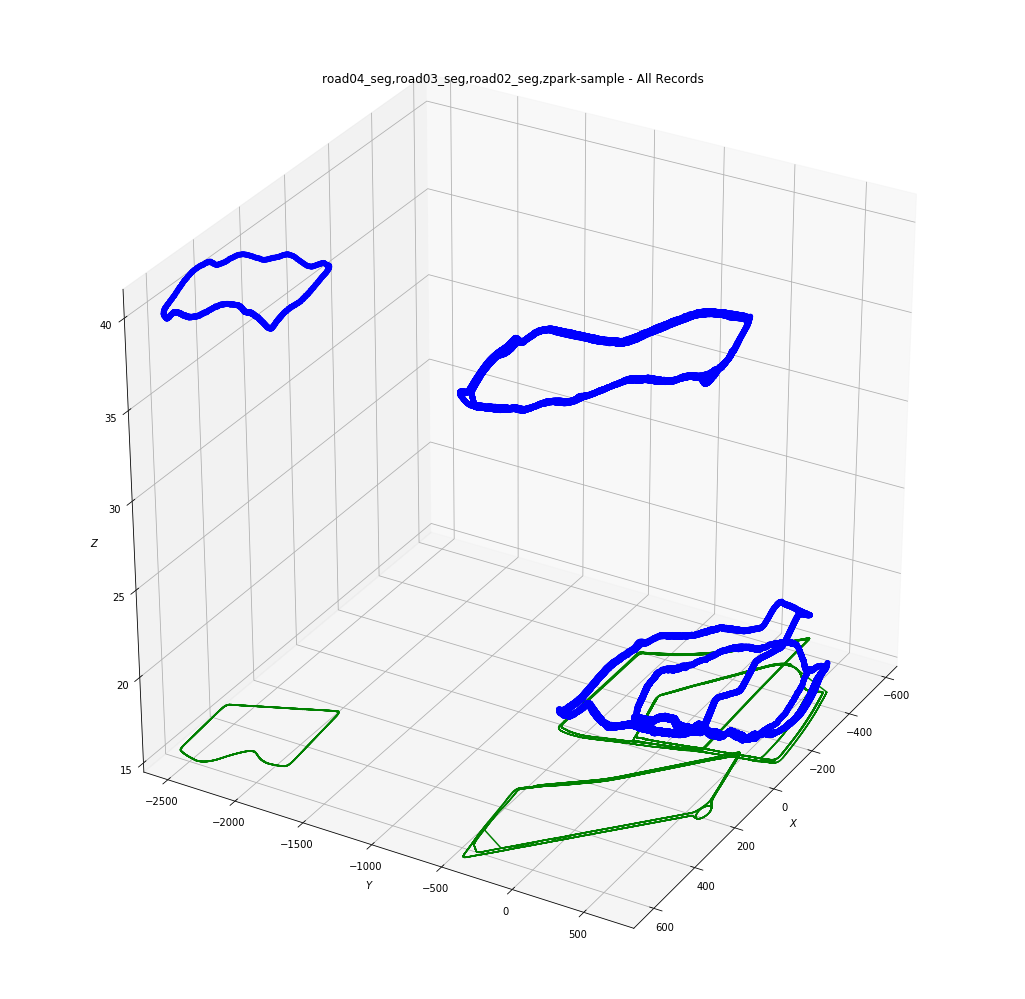

In [9]:
# Draw all records of all datasets on one chart

road04_dataset = Apolloscape(root=os.path.join(APOLLO_PATH), road="road04_seg",transform=transform)
road03_dataset = Apolloscape(root=os.path.join(APOLLO_PATH), road="road03_seg",transform=transform)
road02_dataset = Apolloscape(root=os.path.join(APOLLO_PATH), road="road02_seg", transform=transform)
zpark_sample_dataset = Apolloscape(root=os.path.join(APOLLO_PATH), road="zpark-sample", transform=transform)

datasets = [road04_dataset, road03_dataset, road02_dataset, zpark_sample_dataset] # , zpark_sample_dataset


# Collect all poses from all datasets
all_poses = []
for dataset in datasets:
    ps = dataset.d_poses
    all_poses.extend(ps)
    

# Calculate poses parameters for all records
# all_poses = np.concatenate((poses1, poses2))
p_min, p_max, p_mean, p_std = calc_poses_params(all_poses)
# print("min = {}".format(p_min))
# print("max = {}".format(p_max))
# print("mean = {}".format(p_mean))
# print("std = {}".format(p_std))



fig = plt.figure(figsize=(18, 18))

ax = plt.subplot(1, 1, 1, projection='3d')
ax.view_init(30, 30)
# ax.set_aspect('equal')

ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')


ax.set_title("{} - All Records".format(",".join([d.road for d in datasets])))

# Set plot limits acc to selected poses
ax.set_xlim(int(p_min[0]), int(p_max[0]) + 1)
ax.set_ylim(int(p_min[1]), int(p_max[1]) + 1)
ax.set_zlim(int(p_min[2]), int(p_max[2]) + 1)


for dataset in datasets:
    for record in dataset.records_list:
        dataset.record = record
        
#         data_array_rec = dataset.data_array
#         ps1 = data_array_rec[:, 1]
#         ps2 = data_array_rec[:, 3]
#         mid_poses = 0.5 * (ps1 + ps2)
        
        poses = dataset.d_poses_rec

        # Show all poses for selected record
        draw_poses(ax, poses, proj=True, proj_z=int(p_min[2]), pose_format=dataset.pose_format)
    
    
plt.show()

    